<a href="https://colab.research.google.com/github/mpanuluh/dibimbing-13A/blob/main/Hands_On_Data_Visualization_1_in_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)
# print('matplotlib version : ',matplotlib.__version__)

numpy version :  1.19.2
pandas version :  1.1.5
seaborn version :  0.11.2


## Tidy data format


In [ ]:
# define the data
data = pd.DataFrame({
    'group':['control','variant'],
    'click':[231,265],
    'not-click':[1032,1019]
})

# show the data
data

,group,click,not-click
0,control,231,1032
1,variant,265,1019


In [ ]:
data_tidy = pd.melt(data,
                    id_vars='group',
                    var_name='response')

data_tidy

,group,response,value
0,control,click,231
1,variant,click,265
2,control,not-click,1032
3,variant,not-click,1019


In [ ]:
pd.melt(data, id_vars=['group'], 
        value_vars=['click','not-click'],
        var_name='kolom baru',
        value_name='jumlah user')

,group,kolom baru,jumlah user
0,control,click,231
1,variant,click,265
2,control,not-click,1032
3,variant,not-click,1019


https://pandas.pydata.org/docs/reference/api/pandas.melt.html

## Visualizing bivariate data

In [ ]:
tips_df = sns.load_dataset('tips')
tips_df['score'] = np.log(tips_df['total_bill']+1)
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,score
0,16.99,1.01,Female,No,Sun,Dinner,2,2.889816
1,10.34,1.66,Male,No,Sun,Dinner,3,2.428336
2,21.01,3.50,Male,No,Sun,Dinner,3,3.091497
3,23.68,3.31,Male,No,Sun,Dinner,2,3.205993
4,24.59,3.61,Female,No,Sun,Dinner,4,3.242202


### scatterplot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

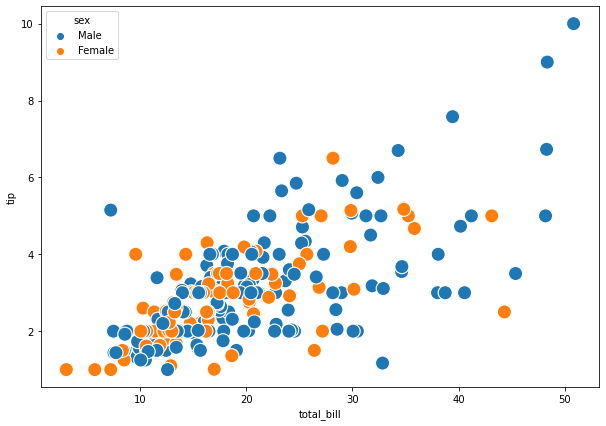

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot(
    x="total_bill", y="tip",
    data=tips_df, hue='sex',
    s=200
)

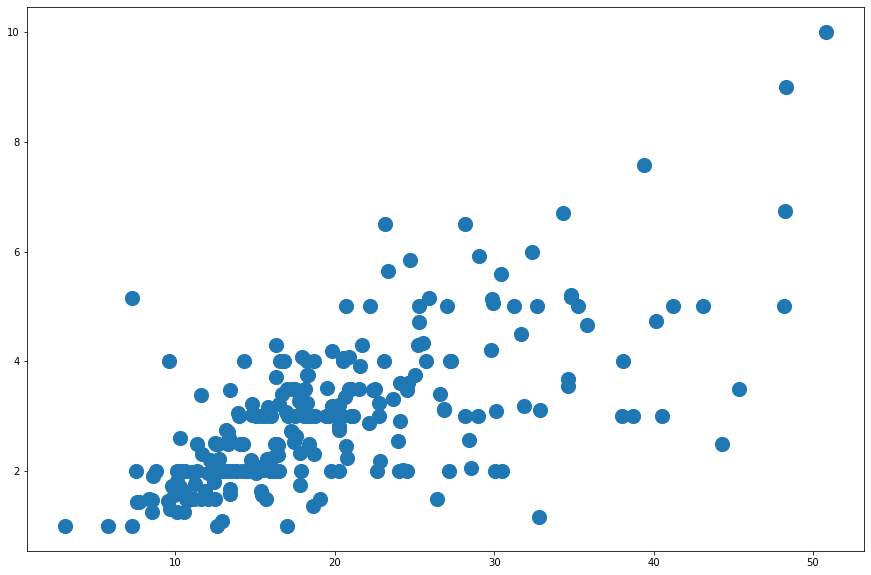

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

plt.scatter(x="total_bill", y="tip",
            data=tips_df,
            s=200)

### Line Plot

In [ ]:
df = pd.DataFrame({'date': ['1/2/2021',
                            '1/3/2021',
                            '1/4/2021',
                            '1/5/2021',
                            '1/6/2021',
                            '1/7/2021',
                            '1/8/2021'],
                   'value': [4, 7, 8, 13, 17, 15, 21]})

df

,date,value
0,1/2/2021,4
1,1/3/2021,7
2,1/4/2021,8
3,1/5/2021,13
4,1/6/2021,17
5,1/7/2021,15
6,1/8/2021,21


<AxesSubplot:xlabel='date', ylabel='value'>

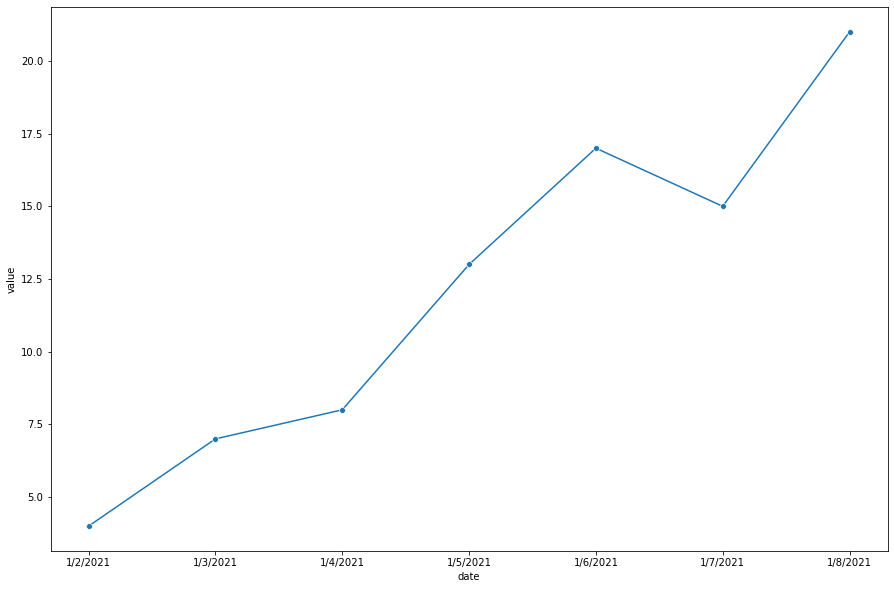

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.lineplot(x="date", y="value",
             data=df,marker= 'o')

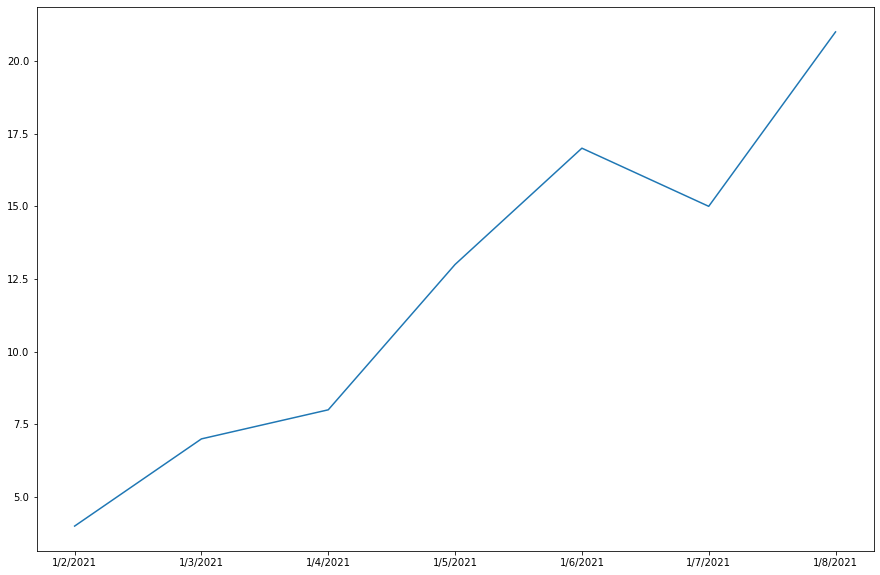

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(df.date, 
         df.value)
plt.show()

In [ ]:
df = pd.read_csv('dataset/flights.csv')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:xlabel='month', ylabel='passengers'>

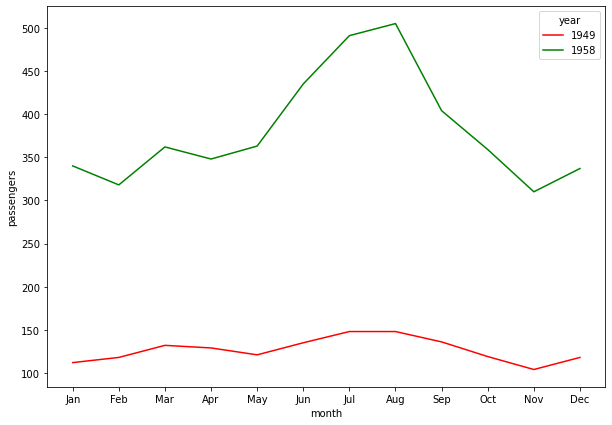

In [ ]:
df_pilihan = df[df['year'].isin([1949,1958])]
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(x="month", y="passengers",hue='year',
             data=df_pilihan, palette=['red','green'])

<AxesSubplot:xlabel='month', ylabel='passengers'>

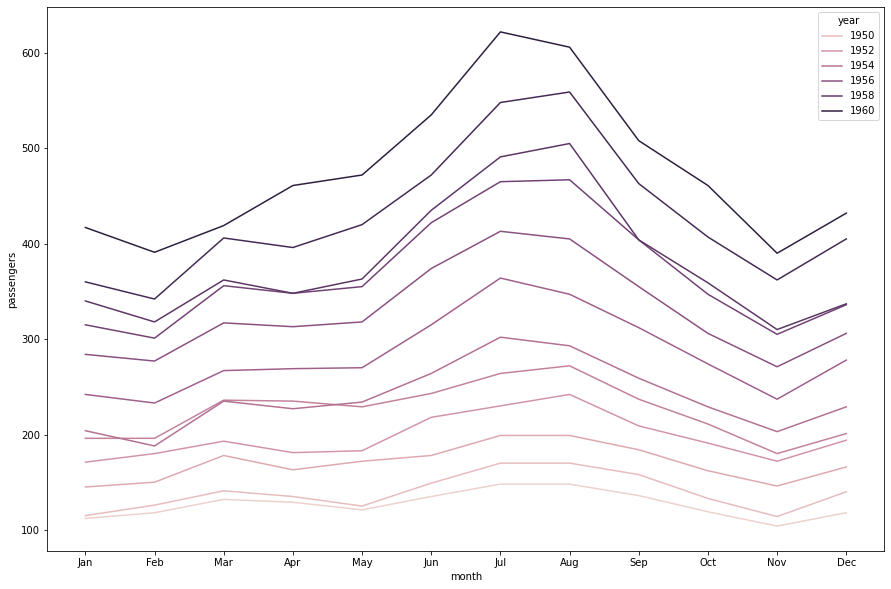

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x="month", y="passengers", hue='year',
             data=df)

### Exercise

In [ ]:
tips_df = sns.load_dataset('tips')
tips_df['score'] = np.log(tips_df['total_bill']+1)
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,score
0,16.99,1.01,Female,No,Sun,Dinner,2,2.889816
1,10.34,1.66,Male,No,Sun,Dinner,3,2.428336
2,21.01,3.50,Male,No,Sun,Dinner,3,3.091497
3,23.68,3.31,Male,No,Sun,Dinner,2,3.205993
4,24.59,3.61,Female,No,Sun,Dinner,4,3.242202


## Visualizing data distribution

### Histogram

In [ ]:
tips_df

,total_bill,tip,sex,smoker,day,time,size,score
0,16.99,1.01,Female,No,Sun,Dinner,2,2.889816
1,10.34,1.66,Male,No,Sun,Dinner,3,2.428336
2,21.01,3.50,Male,No,Sun,Dinner,3,3.091497
3,23.68,3.31,Male,No,Sun,Dinner,2,3.205993
4,24.59,3.61,Female,No,Sun,Dinner,4,3.242202
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.402197
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.338613
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.164208
242,17.82,1.75,Male,No,Sat,Dinner,2,2.934920


<AxesSubplot:xlabel='score', ylabel='Count'>

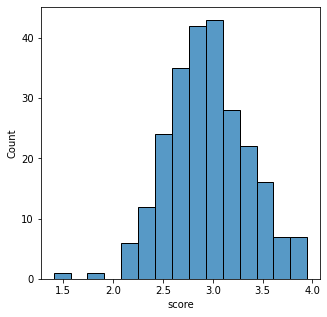

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(data=tips_df,x='score')

<AxesSubplot:xlabel='score'>

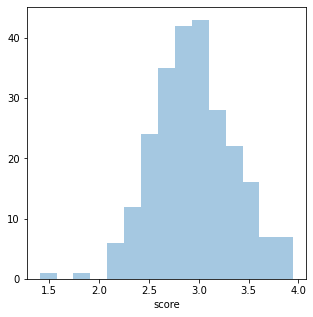

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(tips_df['score'], kde=False)

### KDE Plot

<AxesSubplot:xlabel='score', ylabel='Density'>

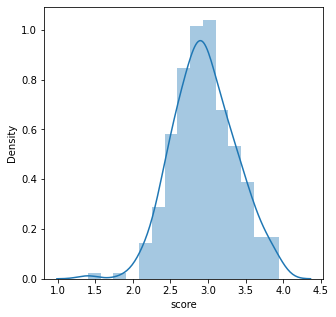

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(tips_df['score'])

<AxesSubplot:xlabel='score', ylabel='Density'>

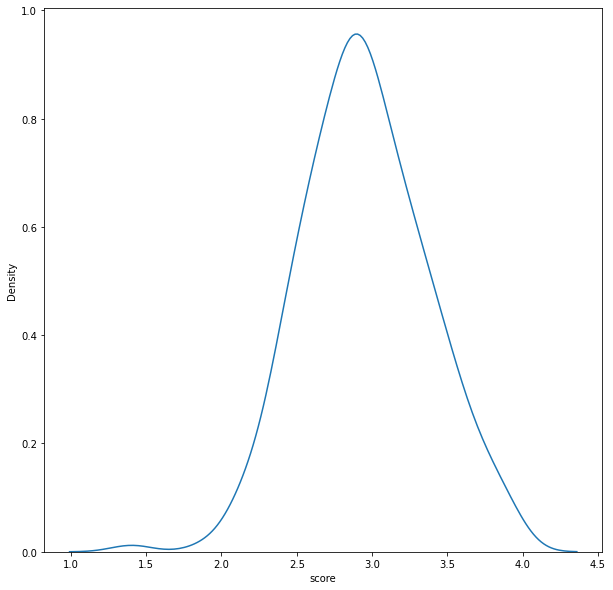

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(tips_df['score'], hist=False)

### Exercise

In [ ]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Visualizing  Categorical Data

### Box Plot

In [ ]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,score
0,16.99,1.01,Female,No,Sun,Dinner,2,2.889816
1,10.34,1.66,Male,No,Sun,Dinner,3,2.428336
2,21.01,3.50,Male,No,Sun,Dinner,3,3.091497
3,23.68,3.31,Male,No,Sun,Dinner,2,3.205993
4,24.59,3.61,Female,No,Sun,Dinner,4,3.242202


<AxesSubplot:ylabel='total_bill'>

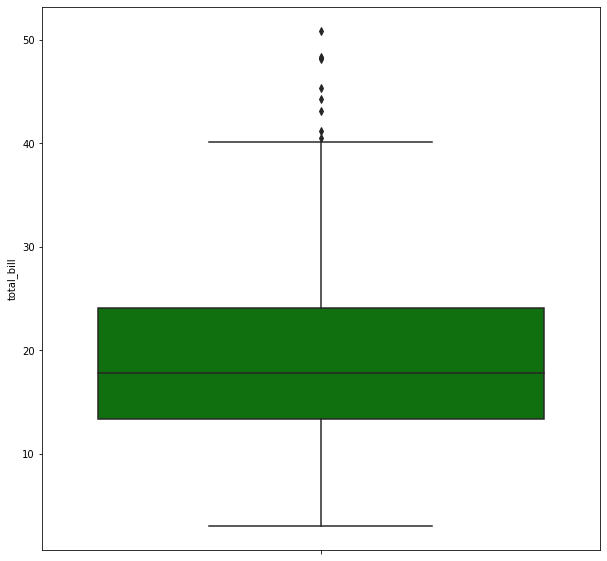

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot( y=tips_df["total_bill"], color='green' )

<AxesSubplot:xlabel='day', ylabel='total_bill'>

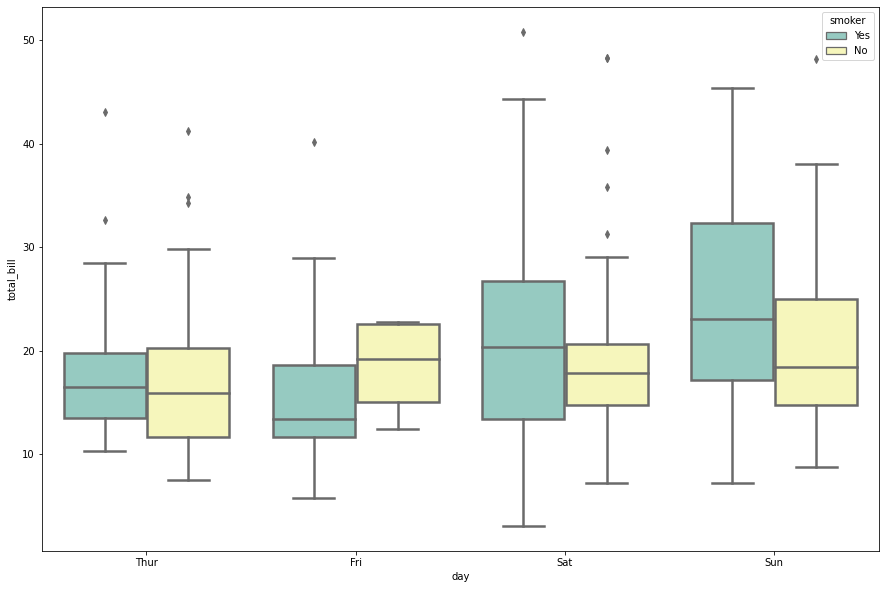

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips_df, linewidth=2.5, palette="Set3")

### Swarm Plot

In [ ]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,score
0,16.99,1.01,Female,No,Sun,Dinner,2,2.889816
1,10.34,1.66,Male,No,Sun,Dinner,3,2.428336
2,21.01,3.50,Male,No,Sun,Dinner,3,3.091497
3,23.68,3.31,Male,No,Sun,Dinner,2,3.205993
4,24.59,3.61,Female,No,Sun,Dinner,4,3.242202


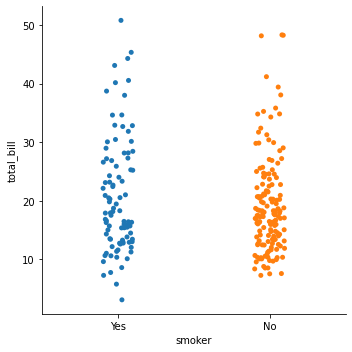

In [ ]:
sns.catplot(x="smoker", y="total_bill", data=tips_df)

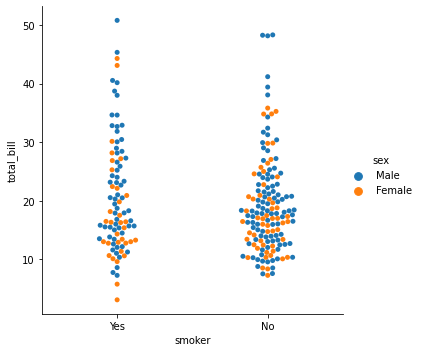

In [ ]:
sns.catplot(x="smoker", y="total_bill",hue= 'sex',kind="swarm",data=tips_df)

### Bar Plot

In [ ]:
df = pd.DataFrame({'Provinsi':['DKI','Jabar','Jateng','Jatim',
                              'Kaltim','Sumbar','Sulteng','Banten'],
                   'Tingkat Pencemaran Udara' : [99,89,79,69,
                                        59,49,39,29]
                  })
df

,Provinsi,Tingkat Pencemaran Udara
0,DKI,99
1,Jabar,89
2,Jateng,79
3,Jatim,69
4,Kaltim,59
5,Sumbar,49
6,Sulteng,39
7,Banten,29


<AxesSubplot:xlabel='Provinsi', ylabel='Tingkat Pencemaran Udara'>

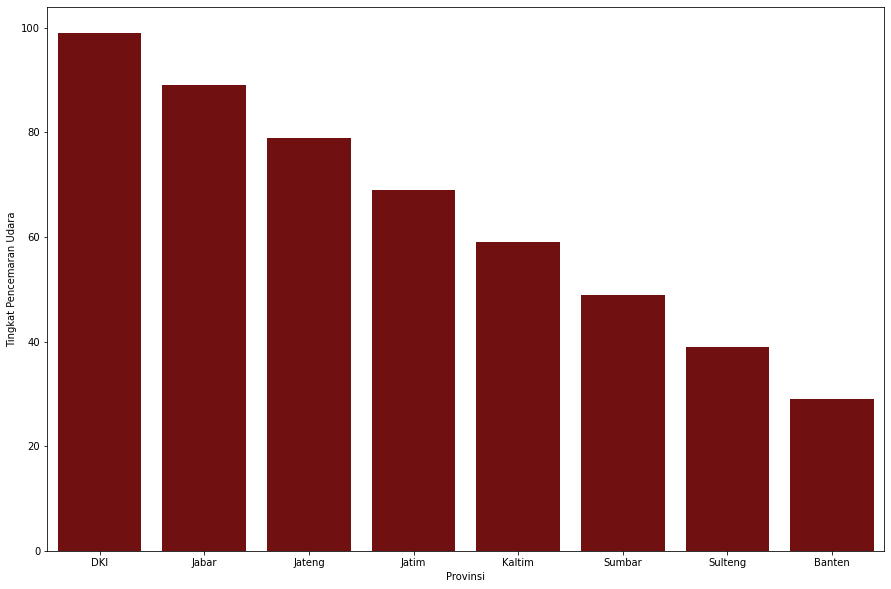

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.barplot(x = 'Provinsi',y='Tingkat Pencemaran Udara',data=df,ax=ax,color ='maroon')

### Exercise

In [ ]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,score
0,16.99,1.01,Female,No,Sun,Dinner,2,2.889816
1,10.34,1.66,Male,No,Sun,Dinner,3,2.428336
2,21.01,3.50,Male,No,Sun,Dinner,3,3.091497
3,23.68,3.31,Male,No,Sun,Dinner,2,3.205993
4,24.59,3.61,Female,No,Sun,Dinner,4,3.242202


## Choosing color palettes


<AxesSubplot:xlabel='Provinsi', ylabel='Tingkat Pencemaran Udara'>

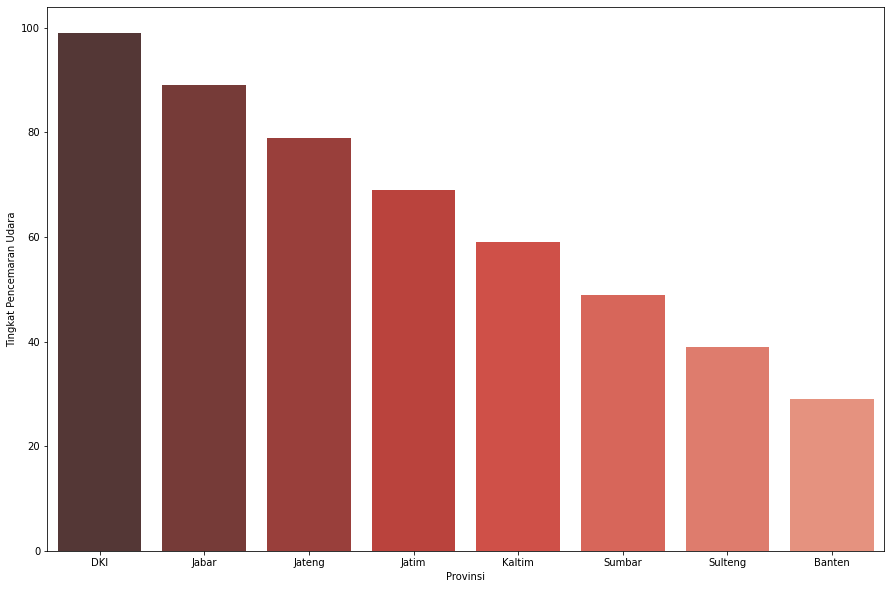

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.barplot(x = 'Provinsi',y='Tingkat Pencemaran Udara',data=df,ax=ax,
               palette=reversed(sns.color_palette("Reds_d", n_colors=8))
               )

<AxesSubplot:xlabel='Provinsi', ylabel='Tingkat Pencemaran Udara'>

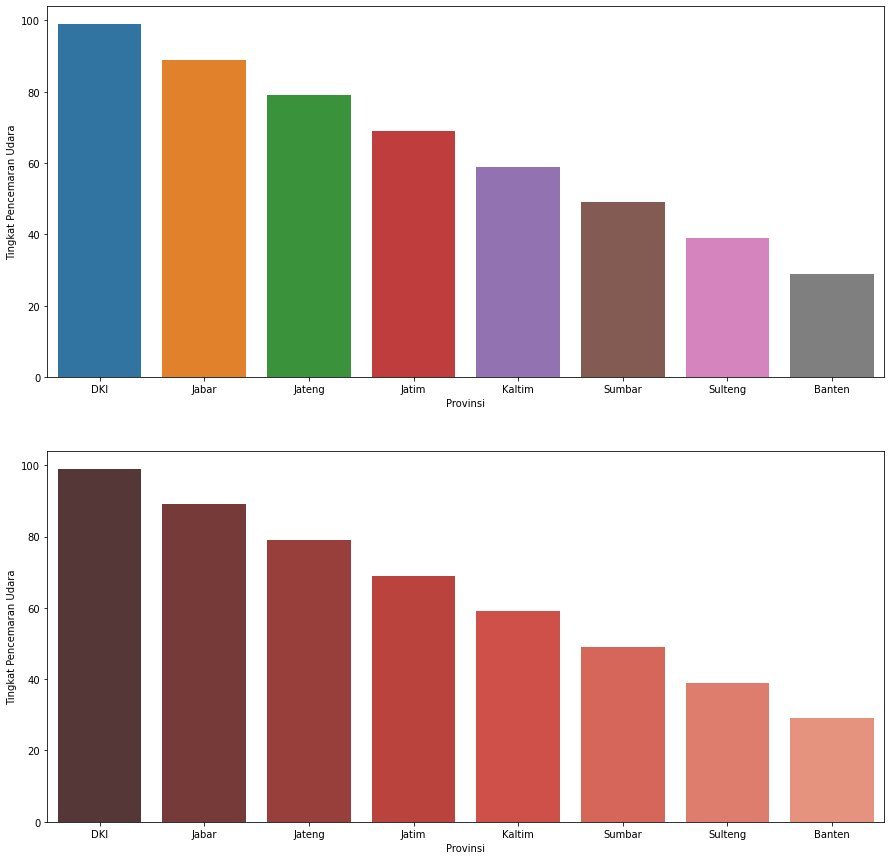

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(15,15))

sns.barplot(x = 'Provinsi',y='Tingkat Pencemaran Udara',data=df,ax=ax[0])
               
sns.barplot(x = 'Provinsi',y='Tingkat Pencemaran Udara',data=df,ax=ax[1],
               palette=reversed(sns.color_palette("Reds_d", n_colors=8))
               )

## Bonus

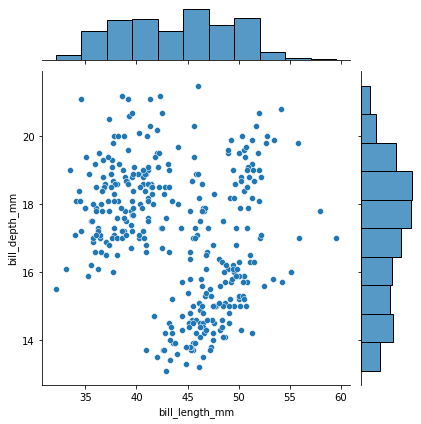

In [ ]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

https://seaborn.pydata.org/generated/seaborn.jointplot.html